## Proyecto 1. 
#### Isabela Trujillo - Laura Vargas
• Consultar para enfermedad de Parkinson, Huntington y Esclerosis Lateral Amiotrófica cómo se diagnostican y el reto que existe para el diagnóstico temprano de dichas enfermedades (5%). • Discutir matemáticamente, explicando con fórmulas, cómo funciona la rutina detrend de scipy (5%) • Discutir matemáticamente, explicando con fórmulas, cómo funciona el filtro hampel (5%) • Discutir matemáticamente y desde la bioingeniería qué mide la entropia de permutación ( https://www.aptech.com/blog/permutation-entropy/ , https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8051436/ ) (5%)

### Enfermedad de Parkinson

El Parkinson es una enfermedad de diagnóstico clínico que presenta síntomas tales como temblor, acinesia, rigidez e inestabilidad postural, lo cual obedece a una patología subyacente específica, definida por una pérdida masiva de neuronas dopaminérgicas pigmentadas de la sustancia negra (SN) con el depósito de cuerpos de Lewy. [1]  
  
Para el diagnóstico el neurólogo considera que la presencia de 2 de los 3 signos motores cardinales (mencionados anteriormente) y una respuesta favorable y mantenida a la l-DOPA (precursor metabólico de la dopamina, es el medicamento con el cual se controla la enfermedad de Parkinson, pero no la cura) del 70% al 100% son esenciales para el diagnóstico de la enfermedad del Parkinson (EP). [1]  
  
Sólo un 75% de los casos diagnosticados clínicamente, se confirman en la autopsia. Esto se debe a que el síndrome de parkinsonismo puede ser producido por múltiples entidades (tabla 1). Adicionalmente es más confuso diagnosticar la enfermedad en una etapa temprana, cuando muchos de los signos distintivos de la EP están ausentes. [1]  

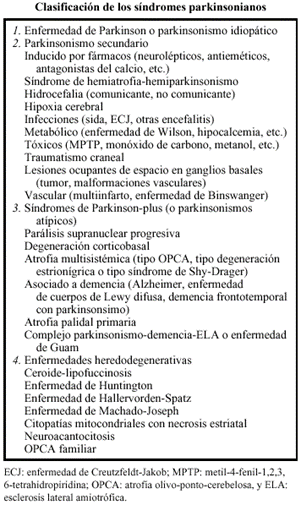

### Enfermedad de Huntington

Inicialmente se hace un diagnostico preliminar el cual esta conformado por examen neurológico, análisis neuropsicológico y una evaluación de salud mental. Con lo cual se puede observar si hay señales y síntomas de la enfermedad, como las alteraciones progresivas de los movimientos, alteraciones mentales y de comportamiento, y si existen otros casos en la familia. [3]  
  
Los estudios por imágenes del cerebro tales como resonancia magnética o tomografías computarizadas pueden proporcionar información detallada sobre la estructura o el funcionamiento del cerebro. Adicionalmente las imágenes obtenidas pueden revelar cambios en las áreas afectadas por la enfermedad de Huntington. Es posible que estos cambios no aparezcan al principio de la enfermedad. Estas pruebas también se pueden usar para descartar otras afecciones que podrían causar los síntomas. [3][4]  
  
El diagnóstico es confirmado mediante una prueba genética para identificar el número de la repetición en la secuencia CAG en el gen HTT. Un número de 26 repeticiones o menos es considerado normal, las personas con 27 a 35 repeticiones no tienen la enfermedad, pero pueden tener hijos o hijas afectadas. Con 36 o más repeticiones de la secuencia en un individuo hay mucha chance de ser afectado. Cuando hay más de 40 repeticiones la persona casi siempre es afectada. [4]  
  
La enfermedad de Huntington es difícil de reconocer en las primeras etapas porque los síntomas son sutiles. Adicionalmente porque muchos de estos síntomas pueden ser causados por otras enfermedades. [2]


### Enfermedad de Esclerosis Lateral Amiotrófica

El diagnóstico de esta patología es esencialmente clínico. Basándose en los criterios de diagnósticos Gold-Coast de la ELA, los cuales son [5]:  
  
  i)	Deterioro motor progresivo documentado por historia clínica o evaluaciones clínicas repetidas, precedidos de una función motora normal [6]  
  ii)	Presencia de disfunción o signos de neurona motora superior o inferior en al menos una región corporal (con compromiso neurona motora superior e inferior identificadas en la misma región corporal, si solo una región corporal está involucrada) o signos de neurona motora inferior en al menos 2 regiones corporales [6]  
  iii)	Exclusión de enfermedades que puedan asemejarse a la ELA [6]  
    
Las pruebas para desechar otras afecciones son: electromiografía, estudio de conducción nerviosa, resonancia magnética, análisis de sangre y de orina, punción lumbar, biopsia muscular y biopsia del nervio. [7]  
Esta enfermedad puede ser difícil de diagnosticar tempranamente porque puede tener síntomas similares a otras enfermedades.


In [98]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import scipy.stats as sis
import scipy.io
import statsmodels.tsa.stattools as sta
from statsmodels.tsa.stattools import adfuller
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
import os
import zipfile
import io
import seaborn as sns

### Programación
- Crear una rutina que permita cargar un archivo .ts y extraiga las 4 señales de interés y las almacene en un ndarray.

In [99]:
def corte (grupo):
    ruta=os.getcwd()
    ts_files_contents_grupo = {}
    
    names= ['Elapsed Time (sec)', 'Left Stride Interval (sec)', 'Right Stride Interval (sec)', 'Left Swing Interval (sec)',
    'Right Swing Interval (sec)',	'Left Swing Interval (% of stride)', 'Right Swing Interval (% of stride)', 'Left Stance Interval (sec)', 'Right Stance Interval (sec)', 'Left Stance Interval (% of stride)',
    'Right Stance Interval (% of stride)', 'Double Support Interval (sec)',	'Double Support Interval (% of stride)']
    
    with zipfile.ZipFile(ruta+'\\EEG_Data.zip', 'r') as zip_ref:
        for file in zip_ref.infolist():
            if file.filename.startswith(grupo) and file.filename.endswith('.ts'):
                with zip_ref.open(file) as ts_file:
                    ts_file_contents = pd.read_csv(ts_file, delimiter='\t', names=names)
                    ts_file_contents = ts_file_contents.iloc[:, 0:5]
                    ts_file_contents = ts_file_contents.to_numpy()
                    ts_files_contents_grupo[file.filename] = ts_file_contents
    return ts_files_contents_grupo
        
control=corte("Control/control")
parkinson=corte("Parkinson/park")
esclerosis=corte("Esclerosis/als")
huntington=corte("Huntington/hunt")
esclerosis.keys()

dict_keys(['Esclerosis/als1.ts', 'Esclerosis/als10.ts', 'Esclerosis/als11.ts', 'Esclerosis/als12.ts', 'Esclerosis/als13.ts', 'Esclerosis/als2.ts', 'Esclerosis/als3.ts', 'Esclerosis/als4.ts', 'Esclerosis/als5.ts', 'Esclerosis/als6.ts', 'Esclerosis/als7.ts', 'Esclerosis/als8.ts', 'Esclerosis/als9.ts'])

#####
 - Para cada señal eliminar los errores en tendencia usando la rutina detrend.

Elimina la tendencia de una serie de tiempo usando una regresión de y contra una tendencia de series de tiempo polinomial de orden p.  
  
Con esta función, suponen que la serie temporal es una combinación aditiva de una tendencia y otros componentes   
  
Y (t)=yo (t)+S(t)+e(t)  
•	Y (t) es la serie temporal original  
•	T (t) es la tendencia  
•	S(t) es el componente estacional  
•	e(t)es el ruido  
  
Entonces, para eliminar la tendencia de una serie temporal, necesitamos estimar el componente de tendencia y luego restarlo de los datos originales, dejándonos solo con el componente estacional y el ruido. [8]


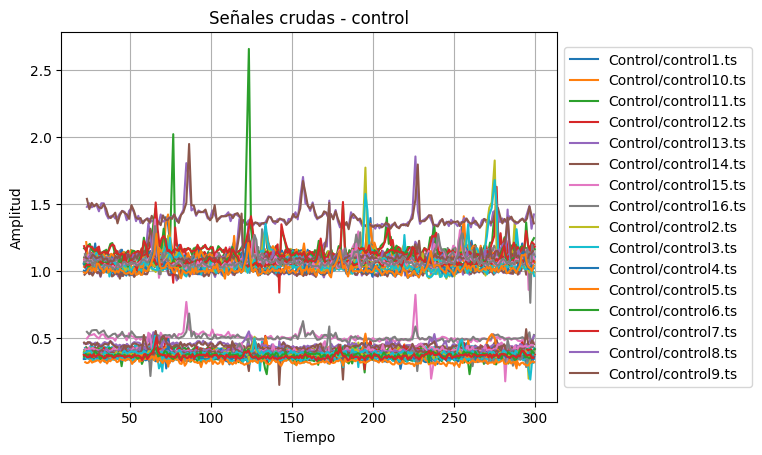

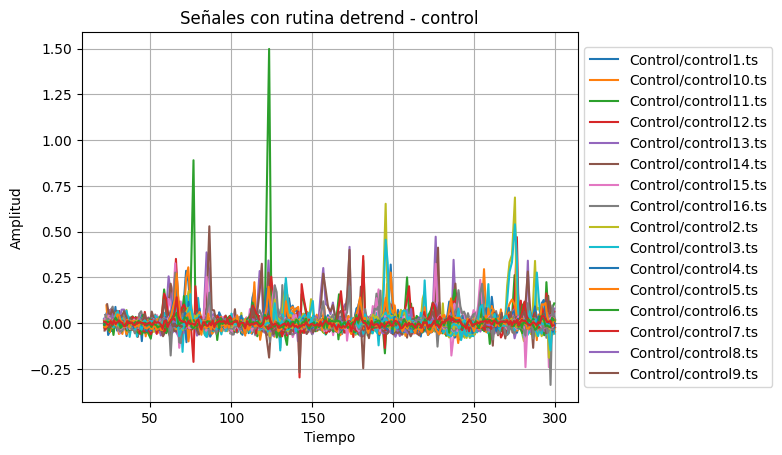

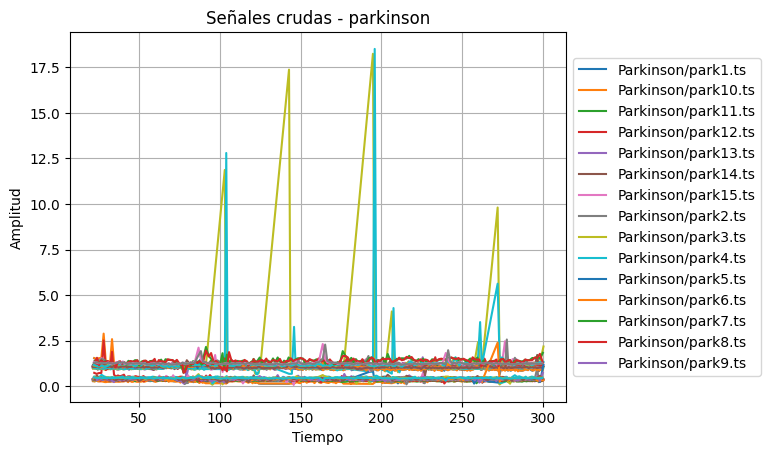

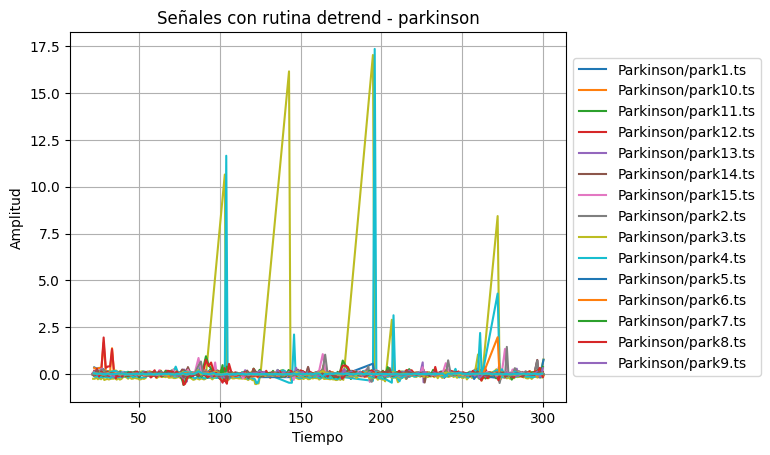

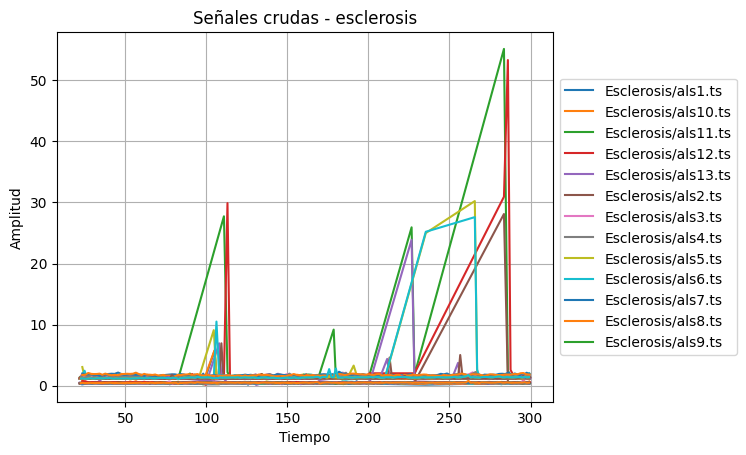

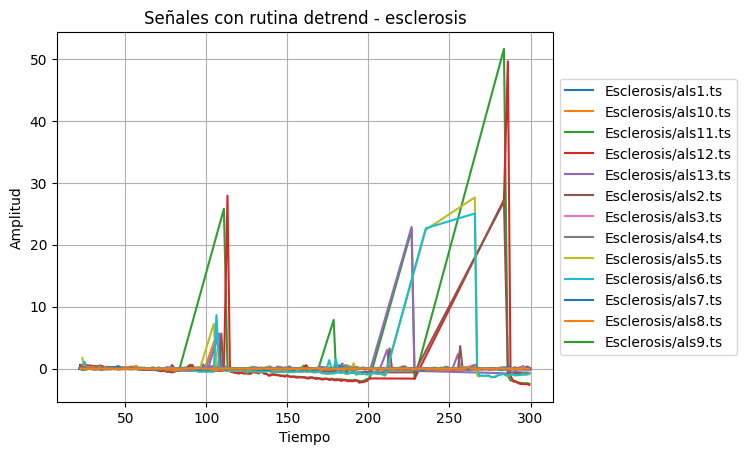

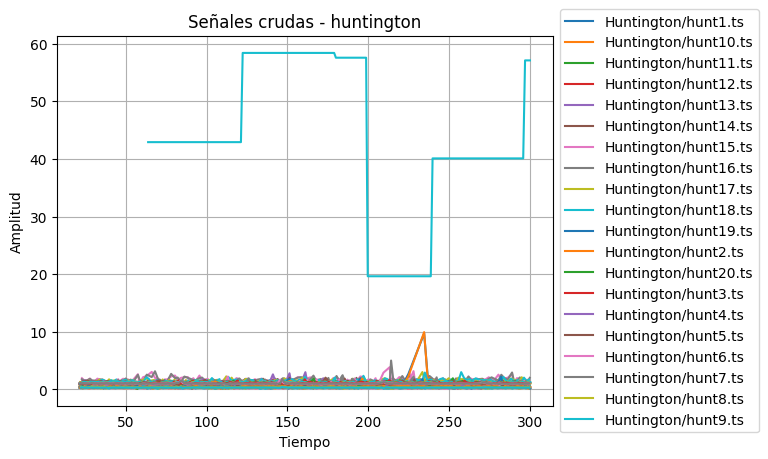

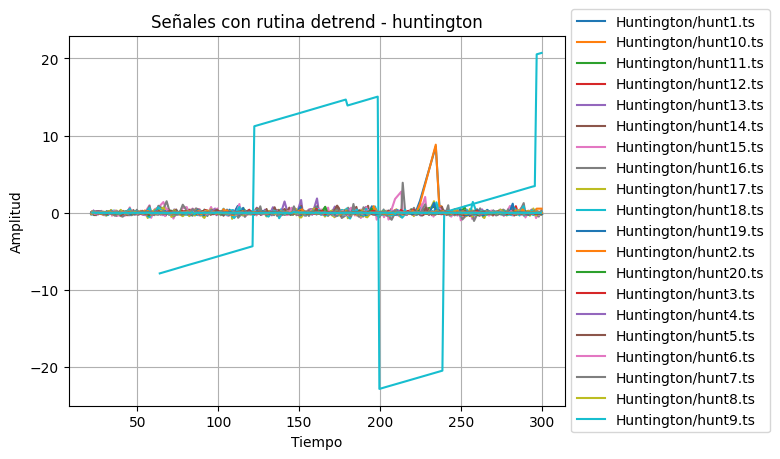

In [100]:
def detrend_senal(grupo,nombre_grupo):
    nuevo_dic={}
    plt.figure()
    for i in grupo.keys(): 
        data = grupo[i].copy()
        for j in range(1,5):
            data[:,j]= signal.detrend(grupo[i][:,j])
        nuevo_dic[i]=data  
        #Graficando las señales crudas 
        x=grupo[i][:,0]
        y=grupo[i][:,range(1,5)]
            
        plt.plot(x,y)
        plt.legend(grupo.keys(),loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xlabel('Tiempo')
        plt.ylabel('Amplitud')
        plt.title('Señales crudas - '+ nombre_grupo)
        plt.grid(True)

    plt.figure()
    for i in nuevo_dic.keys():
        z=nuevo_dic[i][:,0]
        y=nuevo_dic[i][:,range(1,5)]
    
        plt.plot(z,y)
        plt.legend(nuevo_dic.keys(),loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xlabel('Tiempo')
        plt.ylabel('Amplitud')
        plt.title('Señales con rutina detrend - '+ nombre_grupo)
        plt.grid(True)

    return nuevo_dic
dtr_control=detrend_senal(control,'control')
dtr_parkinson=detrend_senal(parkinson,'parkinson')
dtr_esclerosis=detrend_senal(esclerosis,'esclerosis')
dtr_huntington=detrend_senal(huntington,'huntington')

####
- Para cada señal resultante del paso 2 eliminar los datos atípicos usando filtro hampel

Detecta y elimina los valores atípicos de la señal de entrada mediante el identificador de Hampel. Para cada muestra de la señal de entrada, el bloque calcula la mediana de una ventana compuesta por la muestra actual y (Len−1) / 2 de las muestras adyacentes a cada lado de la muestra actual (Len es la longitud de ventana). También calcula la desviación estándar de cada muestra con respecto a la mediana de su ventana mediante la desviación absoluta de la mediana. Si una muestra difiere de la mediana en más del umbral multiplicado por la desviación estándar, el filtro reemplaza la muestra con la mediana [9].  
  
Para una muestra de datos (xs) el algoritmo:  
  
•	Centra la ventana de longitud impar en la muestra actual.  
•	Calcula la mediana local (mi) y la desviación estándar (σi) sobre la ventana actual de datos.  
•	Compara la muestra actual con nσ × σi, donde nσ es el valor umbral. Si ∣ xs−mi ∣ > nσ × σi, el filtro identifica la muestra actual, xs, como un valor atípico y la reemplaza con el valor mediano, mi.


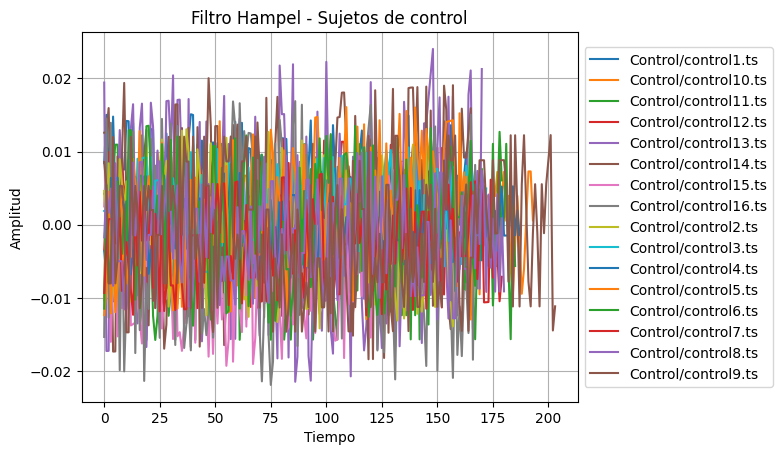

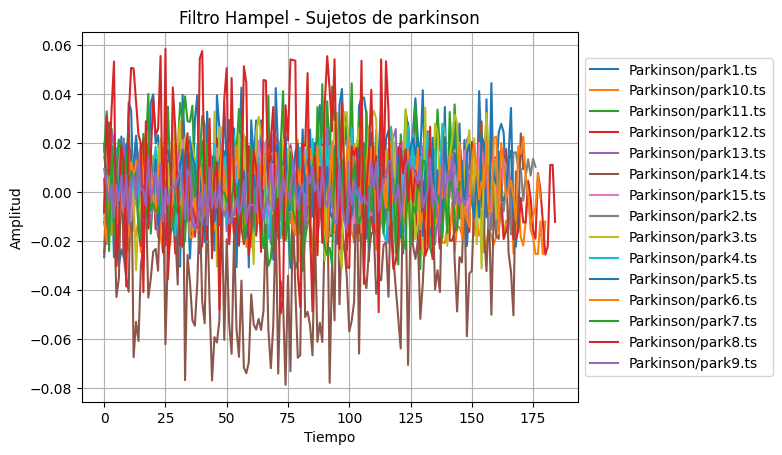

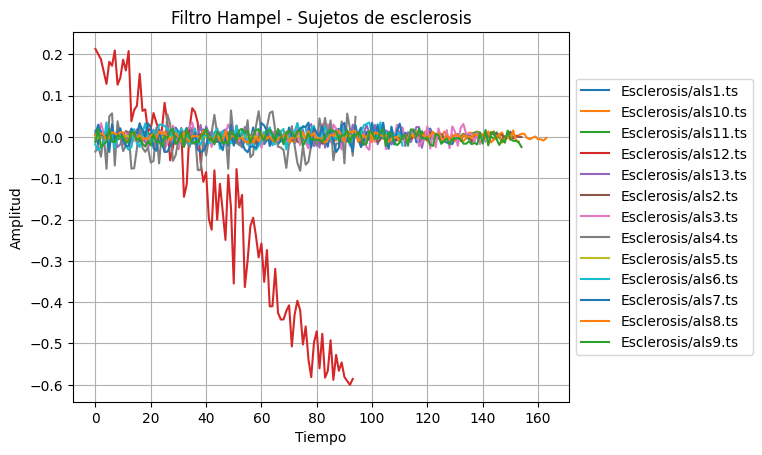

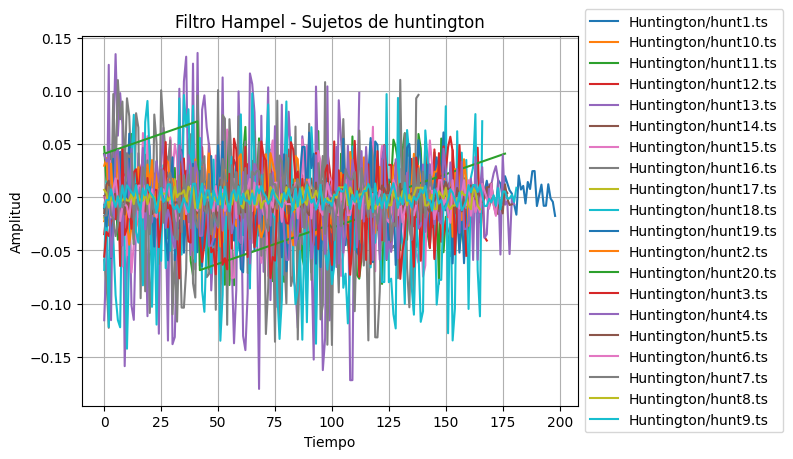

In [101]:
def hampel_filter(data, threshold=1.4826):
    mediana = np.median(data)
    MAD = np.median(np.abs(data-mediana))
    upper_bound = mediana + threshold * MAD
    lower_bound = mediana - threshold * MAD
    filtrar = data[(data>lower_bound) & (data<upper_bound)]
    return filtrar
def hampel_grupo (grupo,nombre_grupo):
    hampel={}
    plt.figure()
    for i in grupo.keys():
        data = grupo[i]
        for k in range(1,5):
            data=grupo[i][:,k]
            intento = hampel_filter(data)
        hampel[i]=intento    
        
        plt.plot(intento)
        plt.legend(grupo.keys(),loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xlabel('Tiempo')
        plt.ylabel('Amplitud')
        plt.title('Filtro Hampel - Sujetos de '+ nombre_grupo)
        plt.grid(True)
    return hampel
h_control=hampel_grupo(dtr_control,'control')      
h_parkinson=hampel_grupo(dtr_parkinson,'parkinson')      
h_esclerosis=hampel_grupo(dtr_esclerosis,'esclerosis')      
h_huntington=hampel_grupo(dtr_huntington,'huntington')      


####
- Crear una función que reciba una señal de marcha y calcule el coeficiente de variación (CV) y la SD tal como se define en el artículo de referencia .

In [102]:
def coeficiente(data):
    Contenido=['Intervalo pasos pie izquierdo','Intervalo pasos pie derecho','Intervalo balanceo pie izquierdo','Intervalo balanceo pie derecho']
    resultados = {}
    for i in range(1,5):
        grupo = data[:,i]
        SD = np.std(grupo)
        CV = 100*SD/np.mean(grupo)
        resultados[f'{Contenido[i-1]} {i}'] = {'SD': SD, 'CV': CV}
    return resultados

def coef_grupos(grupo):
    coef_dic={}
    for i in grupo.keys():
        data = grupo[i]
        coef = coeficiente(data)
        df_coef = pd.DataFrame.from_dict(coef, orient='index')
        coef_dic[i]=df_coef
    return coef_dic

coef_control=coef_grupos(dtr_control)
coef_parkinson=coef_grupos(dtr_parkinson)
coef_huntington=coef_grupos(dtr_huntington)
coef_esclerosis=coef_grupos(dtr_esclerosis)

####
- Crear una función que reciba una señal de marcha y permita calcular la entropía de permutación (10%)


Compara los valores vecinos e identifica patrones de aumento o valores decrecientes. Dado que se determina la similitud basándose en el orden de la secuencia, la entropía de permutación no tiene en cuenta cómo los elementos de un vector son diferentes o iguales. El parámetro necesario para calcular esta entropía es la longitud del vector (dimensión de incrustación), m.  
  
Se calcula a partir de las probabilidades condicionales utilizando la entropía de Shannon:  
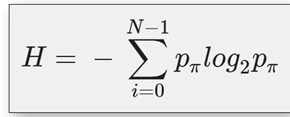  
H es la entropía de Shannon y p es la probabilidad de cada frecuencia relativa de permutaciones únicas, π


In [103]:
def shannon_entropy(data):
  Contenido=['Intervalo pasos pie izquierdo','Intervalo pasos pie derecho','Intervalo balanceo pie izquierdo','Intervalo balanceo pie derecho']
  resultados = {}
  for i in range(1,5):
    grupo = data[:,i]
    p , _ = np.histogram(grupo,bins='fd') #'fd' (estimador de Freedman Diaconis)
    p = p/len(p) #proportion
    h = -p*np.log2(p)
    h[np.isnan(h)] = 0.0
    H = np.sum(h)
    resultados[f'{Contenido[i-1]} {i}'] = {'H': H}
  return resultados

def entropyy(grupo_i):
  ent={}
  for i in grupo_i.keys():

    coso=grupo_i[i]
    data = signal.detrend(coso)
    ent[i]=shannon_entropy(data)
  return ent

entropia_control=entropyy(dtr_control)
entropia_parkinson=entropyy(dtr_parkinson)
entropia_huntington=entropyy(dtr_huntington)
entropia_esclerosis=entropyy(dtr_esclerosis)

C:\Users\lauri\AppData\Local\Temp\ipykernel_18776\3875243633.py:8: RuntimeWarning: divide by zero encountered in log2
  h = -p*np.log2(p)
C:\Users\lauri\AppData\Local\Temp\ipykernel_18776\3875243633.py:8: RuntimeWarning: invalid value encountered in multiply
  h = -p*np.log2(p)


####
- Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 1 y almacene los resultados en un dataframe donde se pueda discriminar nombre participante, condición (Parkinson, Huntington, ELA, Control) y los tres índices/características calculados por cada señal

In [104]:
sujetos=int(len(control.keys()))+int(len(parkinson.keys()))+int(len(huntington.keys()))+int(len(esclerosis.keys()))
grupos=[coef_control,coef_parkinson,coef_huntington,coef_esclerosis ]
ent_grupos=[entropia_control,entropia_parkinson,entropia_huntington,entropia_esclerosis]
diccionario = {'Sujeto':[],'Condición':[],'SD Intervalo pasos pie izquierdo':[],'CV Intervalo pasos pie izquierdo': [],
               'SD Intervalo pasos pie derecho':[], 'CV Intervalo pasos pie derecho': [],
               'SD Intervalo balanceos pie izquierdo':[],'CV Intervalo balanceos pie izquierdo': [],
               'SD Intervalo balanceos pie derecho':[], 'CV Intervalo balanceos pie derecho':[],
               'Entropía pasos pie izquierdo':[],'Entropía balanceos pie izquierdo':[], 'Entropía pasos pie derecho':[], 'Entropía balanceos pie derecho':[]}


####

In [105]:

for i in range(1,sujetos+1):
    diccionario['Sujeto'].append(str(i))
for i in range(0,4):
    g=grupos[i]
    e=ent_grupos[i]
    for k in g.keys():
        if k.startswith('Control'):
            diccionario['Condición'].append('Control')
            diccionario['SD Intervalo pasos pie izquierdo'].append(g[k]['SD'][0])
            diccionario['CV Intervalo pasos pie izquierdo'].append(g[k]['CV'][0])
            diccionario['SD Intervalo pasos pie derecho'].append(g[k]['SD'][1])
            diccionario['CV Intervalo pasos pie derecho'].append(g[k]['CV'][1])
            diccionario['SD Intervalo balanceos pie izquierdo'].append(g[k]['SD'][2])
            diccionario['CV Intervalo balanceos pie izquierdo'].append(g[k]['CV'][2])
            diccionario['SD Intervalo balanceos pie derecho'].append(g[k]['SD'][3])
            diccionario['CV Intervalo balanceos pie derecho'].append(g[k]['CV'][3])
            
            diccionario['Entropía pasos pie izquierdo'].append(e[k]['Intervalo pasos pie izquierdo 1']['H'])
            diccionario['Entropía pasos pie derecho'].append(e[k]['Intervalo pasos pie derecho 2']['H'])
            diccionario['Entropía balanceos pie izquierdo'].append(e[k]['Intervalo balanceo pie izquierdo 3']['H'])
            diccionario['Entropía balanceos pie derecho'].append(e[k]['Intervalo balanceo pie derecho 4']['H'])
          
        elif k.startswith('Parkinson'):
            diccionario['Condición'].append('Parkinson')
            diccionario['SD Intervalo pasos pie izquierdo'].append(g[k]['SD'][0])
            diccionario['CV Intervalo pasos pie izquierdo'].append(g[k]['CV'][0])
            diccionario['SD Intervalo pasos pie derecho'].append(g[k]['SD'][1])
            diccionario['CV Intervalo pasos pie derecho'].append(g[k]['CV'][1])
            diccionario['SD Intervalo balanceos pie izquierdo'].append(g[k]['SD'][2])
            diccionario['CV Intervalo balanceos pie izquierdo'].append(g[k]['CV'][2])
            diccionario['SD Intervalo balanceos pie derecho'].append(g[k]['SD'][3])
            diccionario['CV Intervalo balanceos pie derecho'].append(g[k]['CV'][3])

            diccionario['Entropía pasos pie izquierdo'].append(e[k]['Intervalo pasos pie izquierdo 1']['H'])
            diccionario['Entropía pasos pie derecho'].append(e[k]['Intervalo pasos pie derecho 2']['H'])
            diccionario['Entropía balanceos pie izquierdo'].append(e[k]['Intervalo balanceo pie izquierdo 3']['H'])
            diccionario['Entropía balanceos pie derecho'].append(e[k]['Intervalo balanceo pie derecho 4']['H'])

        elif k.startswith('Huntington'):
            diccionario['Condición'].append('Huntington')
            diccionario['SD Intervalo pasos pie izquierdo'].append(g[k]['SD'][0])
            diccionario['CV Intervalo pasos pie izquierdo'].append(g[k]['CV'][0])
            diccionario['SD Intervalo pasos pie derecho'].append(g[k]['SD'][1])
            diccionario['CV Intervalo pasos pie derecho'].append(g[k]['CV'][1])
            diccionario['SD Intervalo balanceos pie izquierdo'].append(g[k]['SD'][2])
            diccionario['CV Intervalo balanceos pie izquierdo'].append(g[k]['CV'][2])
            diccionario['SD Intervalo balanceos pie derecho'].append(g[k]['SD'][3])
            diccionario['CV Intervalo balanceos pie derecho'].append(g[k]['CV'][3])

            diccionario['Entropía pasos pie izquierdo'].append(e[k]['Intervalo pasos pie izquierdo 1']['H'])
            diccionario['Entropía pasos pie derecho'].append(e[k]['Intervalo pasos pie derecho 2']['H'])
            diccionario['Entropía balanceos pie izquierdo'].append(e[k]['Intervalo balanceo pie izquierdo 3']['H'])
            diccionario['Entropía balanceos pie derecho'].append(e[k]['Intervalo balanceo pie derecho 4']['H'])
            
        elif k.startswith('Esclerosis'):
            diccionario['Condición'].append('Esclerosis')
            diccionario['SD Intervalo pasos pie izquierdo'].append(g[k]['SD'][0])
            diccionario['CV Intervalo pasos pie izquierdo'].append(g[k]['CV'][0])
            diccionario['SD Intervalo pasos pie derecho'].append(g[k]['SD'][1])
            diccionario['CV Intervalo pasos pie derecho'].append(g[k]['CV'][1])
            diccionario['SD Intervalo balanceos pie izquierdo'].append(g[k]['SD'][2])
            diccionario['CV Intervalo balanceos pie izquierdo'].append(g[k]['CV'][2])
            diccionario['SD Intervalo balanceos pie derecho'].append(g[k]['SD'][3])
            diccionario['CV Intervalo balanceos pie derecho'].append(g[k]['CV'][3])

            diccionario['Entropía pasos pie izquierdo'].append(e[k]['Intervalo pasos pie izquierdo 1']['H'])
            diccionario['Entropía pasos pie derecho'].append(e[k]['Intervalo pasos pie derecho 2']['H'])
            diccionario['Entropía balanceos pie izquierdo'].append(e[k]['Intervalo balanceo pie izquierdo 3']['H'])
            diccionario['Entropía balanceos pie derecho'].append(e[k]['Intervalo balanceo pie derecho 4']['H'])
        else:
            print(f'No se encuentra: {k}')
tabla = pd.DataFrame.from_dict(diccionario)
print(tabla)

   Sujeto   Condición  SD Intervalo pasos pie izquierdo  \
0       1     Control                          0.040043   
1       2     Control                          0.041616   
2       3     Control                          0.036803   
3       4     Control                          0.073499   
4       5     Control                          0.037779   
..    ...         ...                               ...   
59     60  Esclerosis                          0.559851   
60     61  Esclerosis                          0.102030   
61     62  Esclerosis                          0.128089   
62     63  Esclerosis                          0.068876   
63     64  Esclerosis                          0.054896   

    CV Intervalo pasos pie izquierdo  SD Intervalo pasos pie derecho  \
0                      -8.492257e+16                        0.036840   
1                       2.223387e+16                        0.039122   
2                      -1.353114e+16                        0.036785   
3  

C:\Users\lauri\AppData\Local\Temp\ipykernel_18776\1141961514.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diccionario['SD Intervalo pasos pie izquierdo'].append(g[k]['SD'][0])
C:\Users\lauri\AppData\Local\Temp\ipykernel_18776\1141961514.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diccionario['CV Intervalo pasos pie izquierdo'].append(g[k]['CV'][0])
C:\Users\lauri\AppData\Local\Temp\ipykernel_18776\1141961514.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

a. Discusión de las diferencias en los grupos usando las gráficas obtenidas usando estadística descriptiva (25%) 

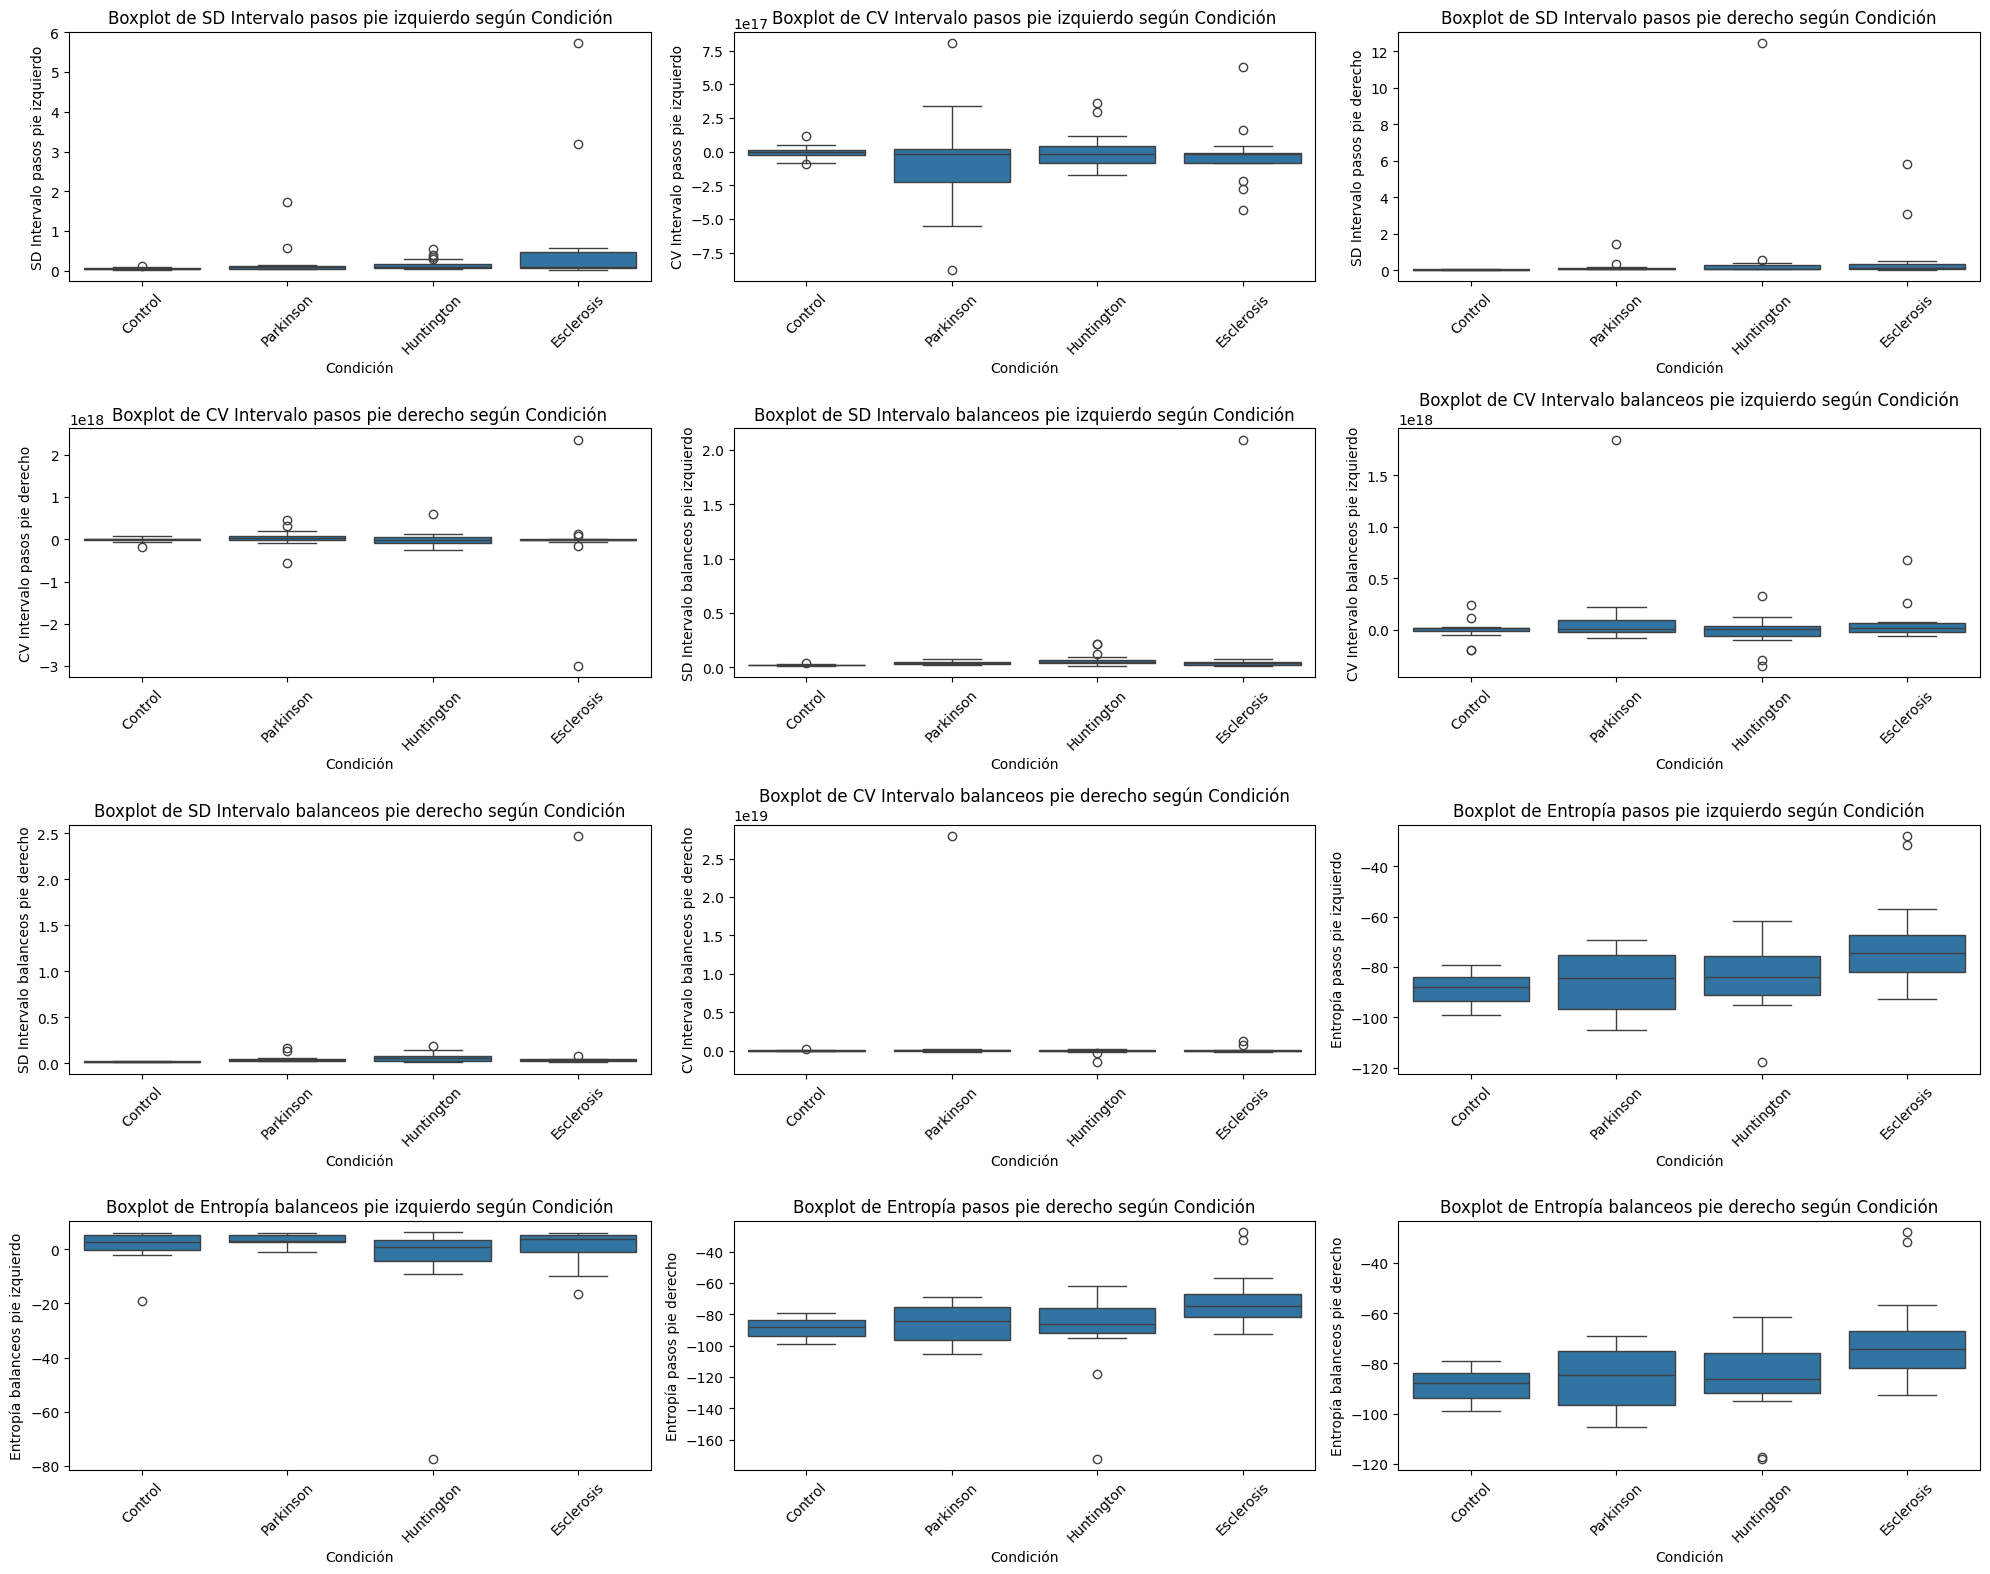

In [106]:
n_cols = 3
n_filas = (len(tabla.columns[2:].tolist()) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_filas, n_cols, figsize=(20, 4 * n_filas))

axes = axes.flatten()

for i, columna in enumerate(tabla.columns[2:].tolist()):
    
    sns.boxplot(x='Condición', y=columna, data=tabla, ax=axes[i])
    axes[i].set_title(f'Boxplot de {columna} según Condición')
    axes[i].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x si es necesario

plt.tight_layout()
plt.show()


#### Se vuelve a graficar disminuyendo datos atípicos para _**mejor observación del diagrama de cajas y bigotes**_ para realizar el análisis

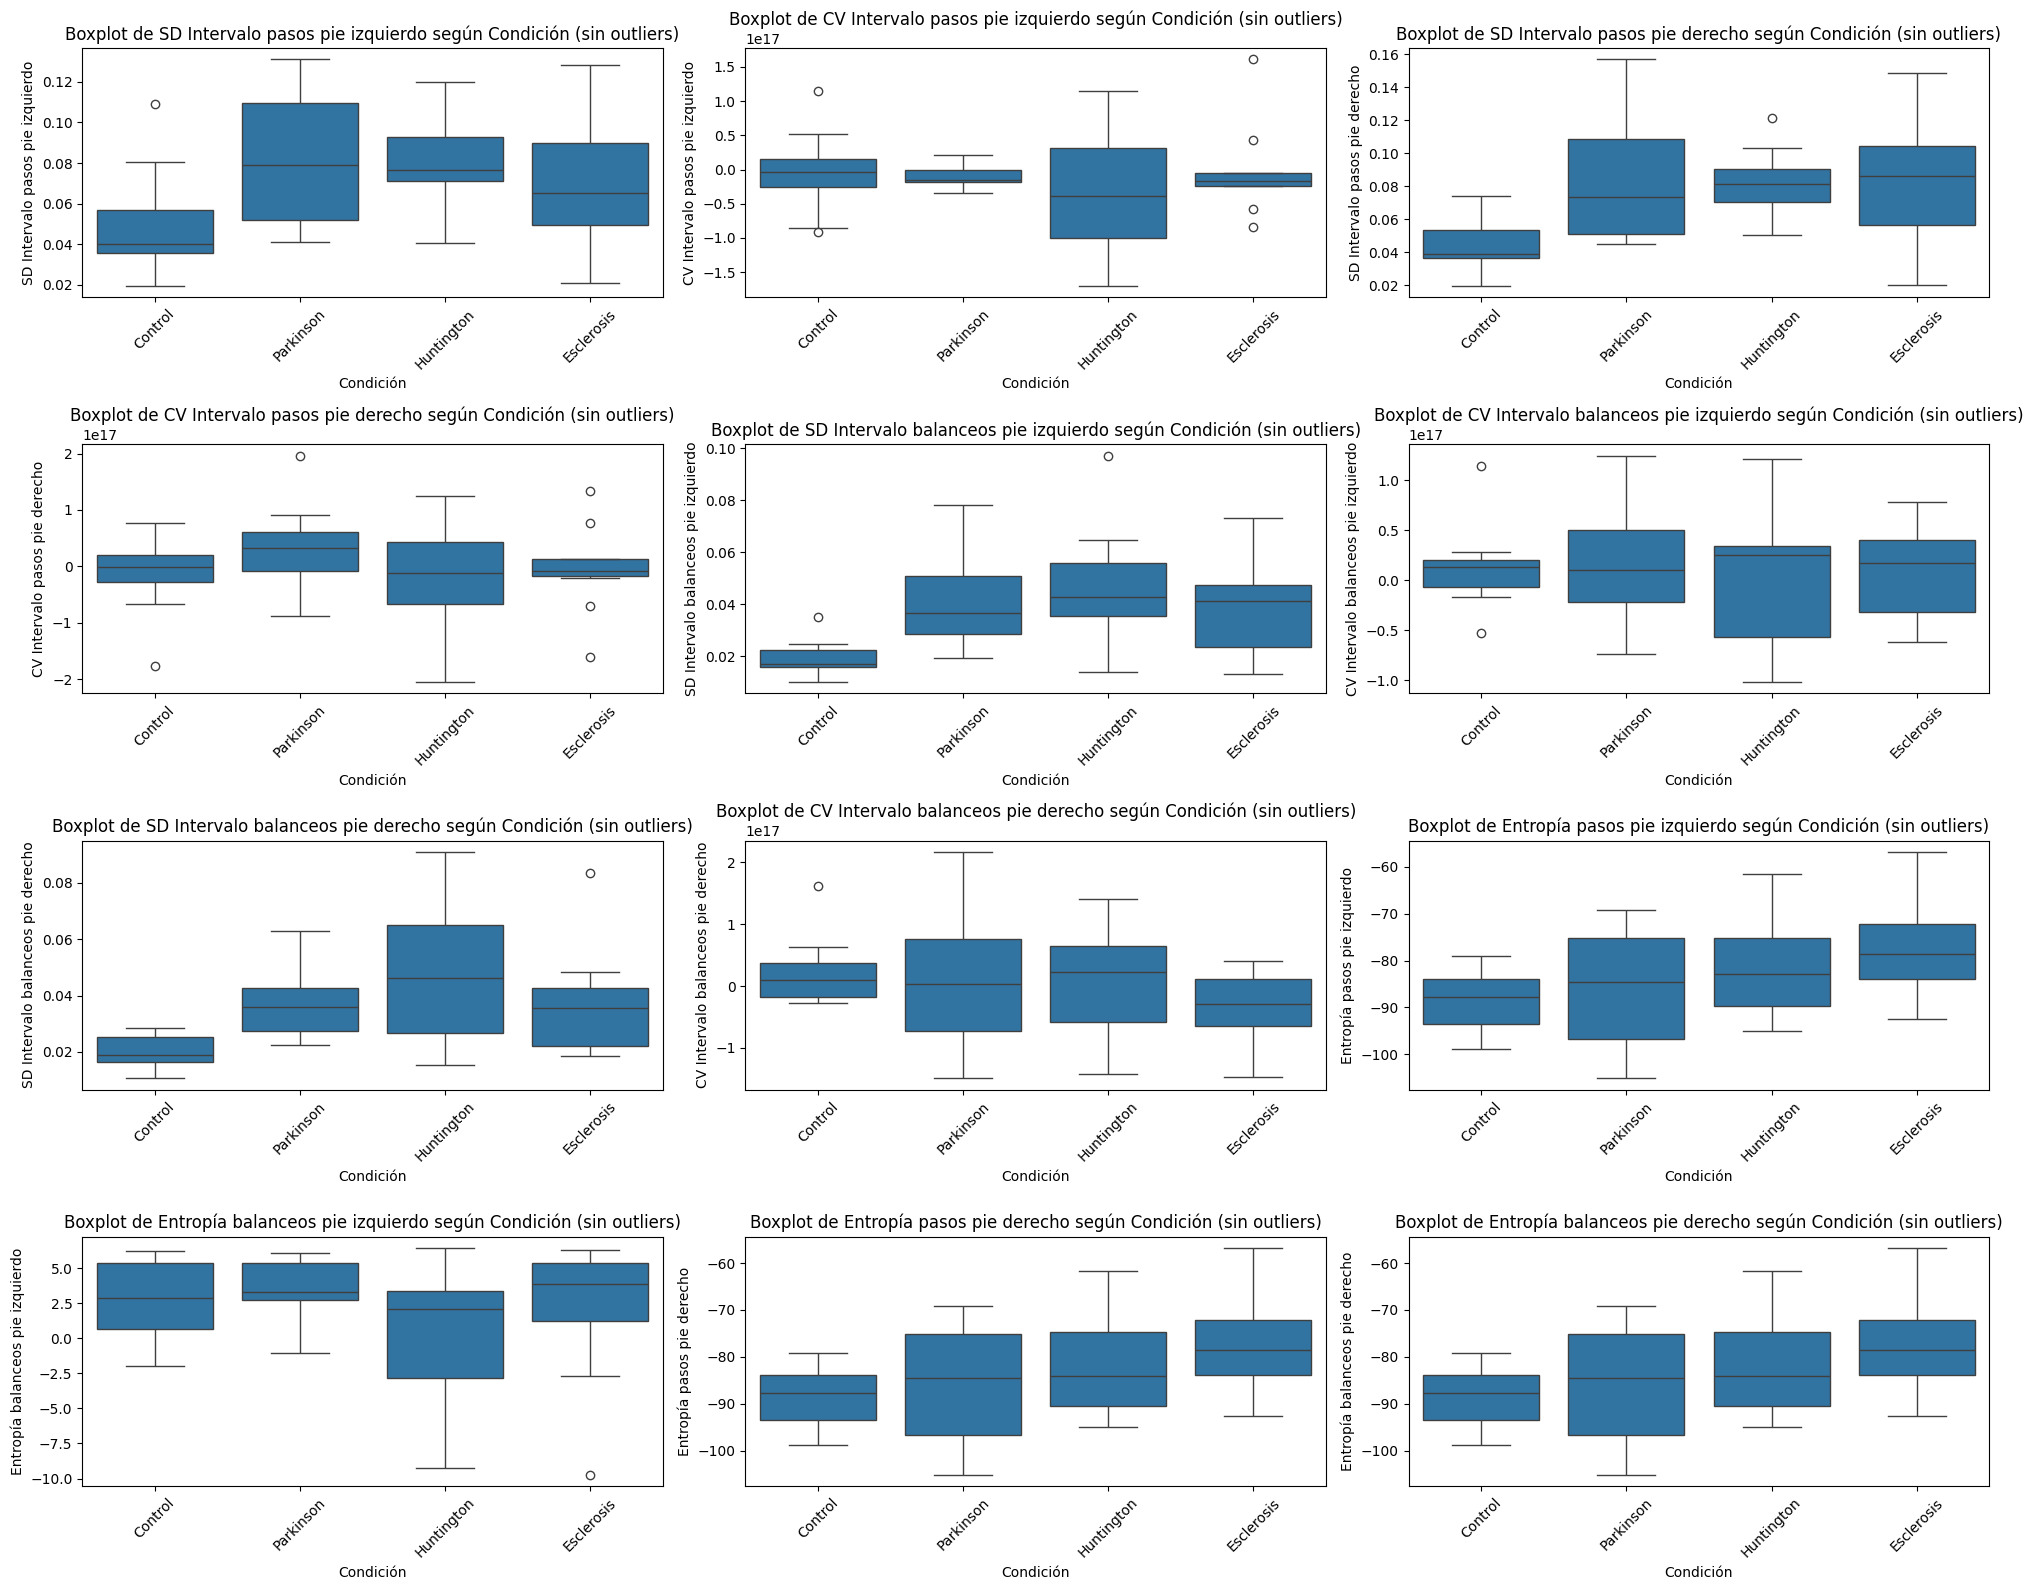

In [107]:
fig, axes = plt.subplots(n_filas, n_cols, figsize=(20, 4 * n_filas))
axes = axes.flatten()
for i, columna in enumerate(tabla.columns[2:].tolist()):
    Q1 = tabla[columna].quantile(0.25)
    Q3 = tabla[columna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR 
    tabla_sin_outliers = tabla[(tabla[columna] >= limite_inferior) & (tabla[columna] <= limite_superior)]

    sns.boxplot(x='Condición', y=columna, data=tabla_sin_outliers, ax=axes[i])
    axes[i].set_title(f'Boxplot de {columna} según Condición (sin outliers)')
    axes[i].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x si es necesario

plt.tight_layout()
plt.show()

Al analizar los diagramas de caja y bigotes, se puede observar que en los valores CV obtenidos de los intervalos de balanceo del pie izquierdo de todos los grupos son muy similares, por lo cual no servirian para realizar una diferenciación entre grupos.  
  
Por otro lado, al observar los valores de entropía obtenidos de los balanceos del pie derecho y de sus pasos se puede observar como por cada grupo hay un aumento, es decir, se observa como el de la esclerosis tiene unos valores mayores, luego sigue el del huntington, a continuación el del parkinson y por ultimo el de control. Adicnalmente, de encontrar facilidad de visualización incluyendo sus datos atípicos por lo que se puede tomar como una medida de relevancia.   

Uno de los datos más relevantes es el valor SD pues se observa que los sujetos control se posicionan en valores por debajo de los sujetos con enfermedades, aunque cabe resaltar que son de los que presentan gran dificultad para observar antes de separarlos de los datos atípicos pero esto puede darse debido a las diferentes afecciones motoras de las enfermedades, viéndose en la disminución de la distancia entre valores atípicos a la caja respectiva.   
  
Por último en los valores que se pueden encontrar más similitud es en los CV obtenidos de los intervalos de pasos pie derecho. Esto indica que no es un factor diferenciador entre las enfermedades y sujetos sanos. 

#### b. Planteamiento de las hipótesis nulas y alternativas (5%), selección del tipo de prueba (paramétrica o no paramétrica) (10%) y discusión de los resultados (10%) 
Recordar para la selección de tipo de prueba se verifica normalidad, homocedasticidad e independencia(este último se asume)

In [113]:
def pruebas_stats(grupo):

    p=[0,0,'SD intervalo pasos',' CV intervalo pasos ',0,0,'SD intervalo balanceos ', 'CV intervalo balanceos',0,0,'Entropía pasos','Entropia balanceos',0]
    estad={'Comparación':[],'Prueba Shapiro-Normalidad 1':[],'Prueba Shapiro-Normalidad 2':[],'Prueba t-Normalidad':[],'Levene- Homocedasticidad':[]}
    i=2
    no_param={'Comparación':[],'Prueba Mann Whitney-Valor P':[]}
    grupo_filas = tabla[tabla['Condición'] == grupo]
    
    while i < len(tabla.columns[2:]):
        if i == 4 or i == 8:
            i=i+1
        else:
            c1=grupo_filas.iloc[:,i+1]
            c2=grupo_filas.iloc[:,i+2]
            shapiro1, p1 = sis.shapiro(c1)
            shapiro2, p2 = sis.shapiro(c2)
            prueba_u, p4 = mannwhitneyu(c1,c2)
            no_param['Prueba Mann Whitney-Valor P'].append(p4)
            no_param['Comparación'].append(p[i])
            homoces, p3 = levene(c1,c2)
            valor_t, valor_p = ttest_ind(c1,c2)
            estad['Comparación'].append(p[i])
            estad['Levene- Homocedasticidad'].append(p3)
            estad['Prueba t-Normalidad'].append(valor_p)
            estad['Prueba Shapiro-Normalidad 1'].append(p1)
            estad['Prueba Shapiro-Normalidad 2'].append(p2)
        if i == 13:
            break
        else:
            i += 1 
    val_p=pd.DataFrame.from_dict(estad)
    mw=pd.DataFrame.from_dict(no_param)
    return val_p,mw

stats_control,mw_c=pruebas_stats('Control')
print('Para Control: \n',stats_control)
stats_esclerosis,mw_e=pruebas_stats('Esclerosis')
print('Para Esclerosis: \n',stats_esclerosis)
stats_huntington,mw_h=pruebas_stats('Huntington')
print('Para Huntington: \n',stats_huntington)
stats_parkinson,mw_p=pruebas_stats('Parkinson')
print(f'Para Parkinson: \n{stats_parkinson}')

Para Control: 
                Comparación  Prueba Shapiro-Normalidad 1  \
0       SD intervalo pasos                     0.357043   
1      CV intervalo pasos                      0.357352   
2  SD intervalo balanceos                      0.008904   
3   CV intervalo balanceos                     0.222796   
4           Entropía pasos                     0.000103   
5       Entropia balanceos                     0.432780   

   Prueba Shapiro-Normalidad 2  Prueba t-Normalidad  Levene- Homocedasticidad  
0                     0.357352         7.282221e-01                  0.000161  
1                     0.094889         5.076828e-01                  0.000493  
2                     0.222796         9.793599e-01                  0.008489  
3                     0.004651         1.623392e-01                  0.000576  
4                     0.432780         5.761231e-28                  0.257166  
5                     0.435071         9.995997e-01                  0.999197  
Para Escle

Homocedasticidad  
  
Ho = Los grupos tienen varianzas iguales  
H1= Los grupos tienen varianzas diferentes  
  
Normalidad   
  
Ho= La distribución es normal  
H1= La distribución no es normal  

Se realizaron dos pruebas de normalidad (Shapiro y Prueba t) y la de homocedasticidad (Lévene) suponiendo la existencia de independencia. 

Los resultados son que la mayoría de las pruebas de normalidad de Shapiro arrojaron un valor menor de 0.05 para los sujetos con enfermedades, a diferencia del control que hubo mayor presencia de valores que superan 0.05. Esto se entiende como que los sujetos enfermos presentan una distribución no normal. Mientras que los sujetos sanos sí presentan una distribución normal, viéndose en las gráficas de cajas y bigotes presentadas anteriormente donde la distribución de datos está centralizada. 

Por otro lado,la mayoría de los valores p de la prueba de normalidad t presentan valores mayores a 0.05 lo que indica que su distribución es normal. Esto indica que no difieren significativamente de sus medias. 

por último, la prueba de homocedasticidad arroja valores menores a 0.05, indicando que no cumplen con la homocedasticidad, es decir que no tienen varianzas iguales y, teniendo en cuenta la información anterior, tampoco cumplen con una distribución normal. Por lo cual es necesario aplicar un análisis no paramétrico (Prueba de Mann-Whitney)


In [112]:
print('Para Control: \n',mw_c)
print('Para Esclerosis: \n',mw_e)
print('Para Huntington: \n',mw_h)
print('Para Parkinson: \n',mw_p)

Para Control: 
                Comparación  Prueba Mann Whitney-Valor P
0       SD intervalo pasos                     1.000000
1      CV intervalo pasos                      1.000000
2  SD intervalo balanceos                      0.235148
3   CV intervalo balanceos                     0.559100
4           Entropía pasos                     0.000002
5       Entropia balanceos                     0.909904
Para Esclerosis: 
                Comparación  Prueba Mann Whitney-Valor P
0       SD intervalo pasos                     0.021016
1      CV intervalo pasos                      0.758316
2  SD intervalo balanceos                      0.329878
3   CV intervalo balanceos                     0.329878
4           Entropía pasos                     0.000016
5       Entropia balanceos                     1.000000
Para Huntington: 
                Comparación  Prueba Mann Whitney-Valor P
0       SD intervalo pasos                 1.000000e+00
1      CV intervalo pasos                  5.97862

Ho= no hay diferencia entre los grupos de la población 

Los resultados de la prueba no paramétricas dicen que no hay diferencia entre los grupos de la población ya que los valores dieron por encima de 0.05. Para este caso, hubo un dato que no coincide en ninguno de los sujetos, la entropia pues todas quedaron debajo de 0.05. 


c. Discutir los resultados obtenidos con los presentado en el artículo base (10%) 

Al analizar los diagramas de caja y bigotes, podemos observar que en los valores CV obtenidos de los intervalos de balanceo del pie izquierdo de todos los grupos son muy similares, por lo cual no nos servirian para realizar una diferenciación entre grupos.  
  
Por otro lado, al observar los valores de entropía obtenidos de los balanceos del pie derecho y de sus pasos se puede observar como por cada grupo hay un aumento, es decir, se observa como el de la esclerosis tiene unos valores mayores, luego sigue el del huntington, a continuación el del parkinson y por ultimo el de control

d. Proponer cuales de las medidas usadas podrían servir para discriminar que poblaciones clínicas de los controles (10%)

En primera parte nos serviría el parámetro SD obtenido del intervalo de los balanceos del pie izquierdo, porque como podemos observar en el diagrama de cajas y bigotes, los valores que obtienen los sujetos de control son mucho más pequeños que aquellas poblaciones que padecen una enfermedad.  
  
Para diferenciar el Parkinson de las demás enfermedades se podría usar los valores de CV obtenidos del intervalo de los pasos pie izquierdo ya que estos son mayores que el de los otros. Para diferenciar el Huntington de los demás se puede con sus valores de entropía obtenidos de los balanceos del pie izquierdo ya que sus valores son menores con respecto al de los otros. Por último se podría usar el valor de entropía obtenidos de los balanceos del pie derecho para diferenciar la Esclerosis de los demás, ya que sus valores son más altos. Todos estos rengos se pueden evidenciar el en diagrama de cajas y bigotes.

### Bibliografía

[1] “La enfermedad de Parkinson: diagnóstico y avances en el conocimiento de la etiología y en el tratamiento”. Elsevier | Un negocio de análisis de información. Accedido el 22 de septiembre de 2024. [En línea]. Disponible: https://www.elsevier.es/es-revista-medicina-integral-63-articulo-la-enfermedad-parkinson-diagnostico-avances-10021650  
[2] “Huntington Disease - Huntington Disease - MSD Manual Consumer Version”. MSD Manual Consumer Version. Accedido el 22 de septiembre de 2024. [En línea]. Disponible: https://www.msdmanuals.com/home/brain-spinal-cord-and-nerve-disorders/movement-disorders/huntington-disease  
[3] “Enfermedad de Huntington - Diagnóstico y tratamiento - Mayo Clinic”. Top-ranked Hospital in the Nation - Mayo Clinic. Accedido el 22 de septiembre de 2024. [En línea]. Disponible: https://www.mayoclinic.org/es/diseases-conditions/huntingtons-disease/diagnosis-treatment/drc-20356122#:~:text=Pruebas%20por%20imágenes%20del%20cerebro%20y%20de%20su%20actividad&amp;text=Estas%20pruebas%20pueden%20incluir%20imágenes,por%20la%20enfermedad%20de%20Huntington.  
[4] “Enfermedad de Huntington | Sobre la enfermedad | GARD”. Genetic and Rare Diseases Information Center | GARD. Accedido el 22 de septiembre de 2024. [En línea]. Disponible: https://rarediseases.info.nih.gov/espanol/11993/enfermedad-de-huntington  
[5] “Esclerosis lateral amiotrofica (ELA): Síntomas, diagnosis y tratamiento. CUN”. https://www.cun.es. Accedido el 22 de septiembre de 2024. [En línea]. Disponible: https://www.cun.es/enfermedades-tratamientos/enfermedades/esclerosis-lateral-amiotrofica#:~:text=¿Cómo%20se%20diagnostica%20la%20ELA,distribución%20que%20presenta%20el%20paciente.   
[6] “ECBE-ELA | hun”. HUN | hun. Accedido el 22 de septiembre de 2024. [En línea]. Disponible: https://www.hun.edu.co/ecbe-ela  
[7] “Esclerosis lateral amiotrófica - Diagnóstico y tratamiento - Mayo Clinic”. Top-ranked Hospital in the Nation - Mayo Clinic. Accedido el 22 de septiembre de 2024. [En línea]. Disponible: https://www.mayoclinic.org/es/diseases-conditions/amyotrophic-lateral-sclerosis/diagnosis-treatment/drc-20354027  
[8] “Detrending Time Series Data With Python”. Forecastegy. Accedido el 22 de septiembre de 2024. [En línea]. Disponible: https://forecastegy.com/posts/detrending-time-series-data-python/  
[9] “Hampel Filter - Filter outliers using Hampel identifier - Simulink- MathWorks América Latina”. MathWorks - Creador de MATLAB y Simulink - MATLAB y Simulink - MATLAB & Simulink. Accedido el 22 de septiembre de 2024. [En línea]. Disponible: https://la.mathworks.com/help/dsp/ref/hampelfilter.html
